In [1]:
%matplotlib inline

In [2]:
# Gradient Boosting Regression learns from mistakes. It tries
# to fit a bunch of weak learners
#   -> Individually, each learner has poor accuracy but together
#      they have good accuracy.
#   -> They're applied sequentially meaning that each learner
#      becomes an expert in the mistakes of the prior learner.

In [31]:
from sklearn.datasets import make_regression
import numpy as np

In [32]:
X, y = make_regression(1000, 2, noise=10)

In [33]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [34]:
gbr = GBR()
gbr.fit(X, y)

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             random_state=None, subsample=1.0, verbose=0, warm_start=False)

In [35]:
gbr_preds = gbr.predict(X)

In [36]:
gbr_preds[:5]

array([ -83.85399942,   21.77255753, -114.42847686,  -27.64663971,
        -59.6504926 ])

In [37]:
np.mean(np.power(y - gbr_preds, 2))

82.357155799315549

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
lr_preds = lr.predict(X)

In [41]:
# see how GBR performs vs Linear Regression
gbr_residuals = y - gbr_preds
lr_residuals = y - lr_preds

In [42]:
import matplotlib.pyplot as plt

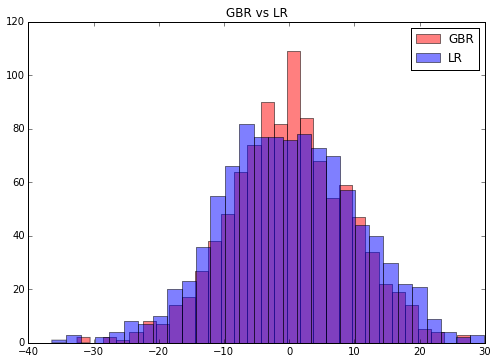

In [43]:
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
ax.hist(gbr_residuals, label='GBR', alpha=.5, color='r', bins=30)
ax.hist(lr_residuals, label='LR', alpha=.5, color='b', bins=30)

ax.set_title("GBR vs LR")
ax.legend(loc='best')

In [44]:
np.percentile(gbr_residuals, [2.5, 97.5])

array([-18.03681615,  17.74545291])

In [45]:
np.percentile(lr_residuals, [2.5, 97.5])

array([-20.88266736,  20.00250063])

In [46]:
# lines above take the 95th percentile to see error range.

In [47]:
n_estimators = np.arange(100, 1100, 350)
gbrs = [GBR(n_estimators=n_estimator) for n_estimator in n_estimators]

In [48]:
residuals = {}
for i, gbr in enumerate(gbrs):
    gbr.fit(X, y)
    residuals[gbr.n_estimators] = y - gbr.predict(X)


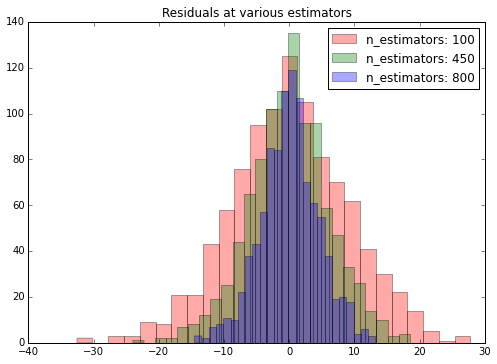

In [54]:
f, ax = plt.subplots(figsize=(7,5))
f.tight_layout()
colors = ['r', 'g', 'b']
for i, gbr in enumerate(gbrs):
    ax.hist(residuals[gbr.n_estimators], color=colors[i], alpha=.333, label="n_estimators: {}".format(gbr.n_estimators), bins=25)
    
ax.set_title("Residuals at various estimators")
ax.legend(loc='best')

In [56]:
# the graph above should show that as the number of estimators
# goes up, the error should go down.
# Also should strongly consider tuning the max_depth because
# each of the learners is a tree.
# Also should strongly consider tuning the loss function because
# this determines how the error is computed; default is:
# least squares ('ls')